In [1]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [5]:
import requests
requests.__version__

'2.24.0'

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9627287f4524613874457d10385800d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | gigmoto
Processing Record 6 of Set 1 | monrovia
Processing Record 7 of Set 1 | brattvag
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | namatanai
Processing Record 11 of Set 1 | hearst
Processing Record 12 of Set 1 | lemesos
City not found. Skipping...
Processing Record 13 of Set 1 | gbadolite
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | jaru
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | mackay
Processing Record 18 of Set 1 | minden
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | havoysund
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | sola
Proc

Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | watsa
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | kiunga
Processing Record 45 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 46 of Set 4 | cagnes-sur-mer
Processing Record 47 of Set 4 | celestun
Processing Record 48 of Set 4 | concepcion
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | filimonovo
Processing Record 4 of Set 5 | hastings
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | dingle
Processing Record 7 of Set 5 | yellowknife
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | saint-pierre
Processing Record 10 of Set 5 | maceio
Processing Record 11 of Set 5 | tautira
Processing Record 12 of Set 5

Processing Record 29 of Set 8 | jiayuguan
Processing Record 30 of Set 8 | bereda
Processing Record 31 of Set 8 | steamboat springs
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | omis
Processing Record 34 of Set 8 | korla
Processing Record 35 of Set 8 | wanaka
Processing Record 36 of Set 8 | sinazongwe
Processing Record 37 of Set 8 | jinchang
Processing Record 38 of Set 8 | mergui
City not found. Skipping...
Processing Record 39 of Set 8 | miles city
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | warqla
City not found. Skipping...
Processing Record 42 of Set 8 | rabo de peixe
Processing Record 43 of Set 8 | ambunti
Processing Record 44 of Set 8 | pierre
Processing Record 45 of Set 8 | sao borja
Processing Record 46 of Set 8 | kota kinabalu
Processing Record 47 of Set 8 | jumla
Processing Record 48 of Set 8 | miandoab
Processing Record 49 of Set 8 | denpasar
Processing Record 50 of Set 8 | padang
Processing Record 1 of Set 9 | 

City not found. Skipping...
Processing Record 14 of Set 12 | porto velho
Processing Record 15 of Set 12 | buraydah
Processing Record 16 of Set 12 | nguiu
City not found. Skipping...
Processing Record 17 of Set 12 | berdigestyakh
Processing Record 18 of Set 12 | neiafu
Processing Record 19 of Set 12 | san quintin
Processing Record 20 of Set 12 | artyk
City not found. Skipping...
Processing Record 21 of Set 12 | northam
Processing Record 22 of Set 12 | yarada
Processing Record 23 of Set 12 | auki
Processing Record 24 of Set 12 | kazachinskoye
Processing Record 25 of Set 12 | kot samaba
Processing Record 26 of Set 12 | umm durman
City not found. Skipping...
Processing Record 27 of Set 12 | weyburn
Processing Record 28 of Set 12 | kampot
Processing Record 29 of Set 12 | yar-sale
Processing Record 30 of Set 12 | muromtsevo
Processing Record 31 of Set 12 | todos santos
Processing Record 32 of Set 12 | sorong
Processing Record 33 of Set 12 | sitka
Processing Record 34 of Set 12 | aksarka
Proc

In [10]:
len(city_data)

583

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,81.00,74,40,5.82,US,2020-07-11 22:11:52
1,New Norfolk,-42.78,147.06,45.00,92,50,1.28,AU,2020-07-11 22:11:53
2,Luderitz,-26.65,15.16,53.60,81,0,5.82,NA,2020-07-11 22:11:53
3,Hobart,-42.88,147.33,46.00,93,75,1.12,AU,2020-07-11 22:11:18
4,Gigmoto,13.78,124.39,80.46,79,100,2.19,PH,2020-07-11 22:08:10
5,Monrovia,6.30,-10.80,76.12,80,52,12.35,LR,2020-07-11 22:11:54
6,Brattvag,62.60,6.44,50.00,87,95,13.87,NO,2020-07-11 22:11:54
7,Laguna,38.42,-121.42,104.00,17,1,4.70,US,2020-07-11 22:11:54
8,Namatanai,-3.67,152.43,81.34,80,52,6.76,PG,2020-07-11 22:11:54
9,Hearst,49.68,-83.67,63.21,63,99,10.22,CA,2020-07-11 22:11:55


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-07-11 22:11:52,41.37,-73.41,81.00,74,40,5.82
1,New Norfolk,AU,2020-07-11 22:11:53,-42.78,147.06,45.00,92,50,1.28
2,Luderitz,NA,2020-07-11 22:11:53,-26.65,15.16,53.60,81,0,5.82
3,Hobart,AU,2020-07-11 22:11:18,-42.88,147.33,46.00,93,75,1.12
4,Gigmoto,PH,2020-07-11 22:08:10,13.78,124.39,80.46,79,100,2.19
...,...,...,...,...,...,...,...,...,...
578,Mocuba,MZ,2020-07-11 22:13:43,-16.84,36.99,64.02,75,0,4.09
579,Flores Da Cunha,BR,2020-07-11 22:13:43,-29.03,-51.18,57.00,99,100,2.04
580,Coihaique,CL,2020-07-11 22:12:00,-45.58,-72.07,33.80,74,40,5.50
581,Parati,BR,2020-07-11 22:13:43,-23.22,-44.71,75.20,44,40,3.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/11/20'

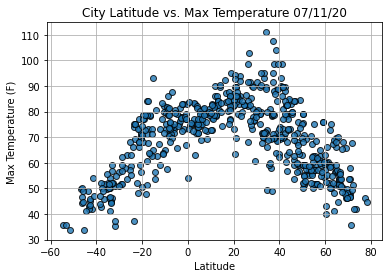

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

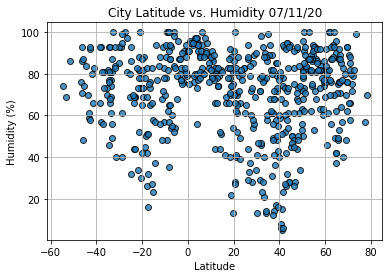

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

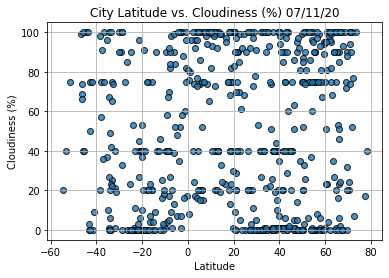

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

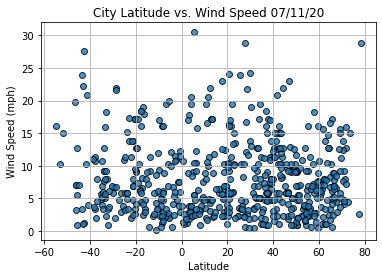

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2020-07-11 22:11:56
Lat                         -46.6
Lng                        168.33
Max Temp                    49.64
Humidity                       76
Cloudiness                     99
Wind Speed                  19.82
Name: 13, dtype: object

In [25]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-07-11 22:11:52,41.37,-73.41,81.00,74,40,5.82
1,New Norfolk,AU,2020-07-11 22:11:53,-42.78,147.06,45.00,92,50,1.28
2,Luderitz,NA,2020-07-11 22:11:53,-26.65,15.16,53.60,81,0,5.82
3,Hobart,AU,2020-07-11 22:11:18,-42.88,147.33,46.00,93,75,1.12
4,Gigmoto,PH,2020-07-11 22:08:10,13.78,124.39,80.46,79,100,2.19
5,Monrovia,LR,2020-07-11 22:11:54,6.30,-10.80,76.12,80,52,12.35
6,Brattvag,NO,2020-07-11 22:11:54,62.60,6.44,50.00,87,95,13.87
7,Laguna,US,2020-07-11 22:11:54,38.42,-121.42,104.00,17,1,4.70
8,Namatanai,PG,2020-07-11 22:11:54,-3.67,152.43,81.34,80,52,6.76
9,Hearst,CA,2020-07-11 22:11:55,49.68,-83.67,63.21,63,99,10.22


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-07-11 22:11:52,41.37,-73.41,81.00,74,40,5.82
4,Gigmoto,PH,2020-07-11 22:08:10,13.78,124.39,80.46,79,100,2.19
5,Monrovia,LR,2020-07-11 22:11:54,6.30,-10.80,76.12,80,52,12.35
6,Brattvag,NO,2020-07-11 22:11:54,62.60,6.44,50.00,87,95,13.87
7,Laguna,US,2020-07-11 22:11:54,38.42,-121.42,104.00,17,1,4.70
...,...,...,...,...,...,...,...,...,...
571,Lucea,JM,2020-07-11 22:13:42,18.45,-78.17,80.60,83,40,6.93
574,Saint-Francois,FR,2020-07-11 22:13:42,46.42,3.91,62.60,45,86,5.82
575,Grand Island,US,2020-07-11 22:10:25,40.92,-98.34,86.00,51,20,11.41
576,Shenjiamen,CN,2020-07-11 22:13:43,29.96,122.30,78.04,90,91,24.23


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [29]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-07-11 22:11:52,41.37,-73.41,81.00,74,40,5.82
4,Gigmoto,PH,2020-07-11 22:08:10,13.78,124.39,80.46,79,100,2.19
5,Monrovia,LR,2020-07-11 22:11:54,6.30,-10.80,76.12,80,52,12.35
6,Brattvag,NO,2020-07-11 22:11:54,62.60,6.44,50.00,87,95,13.87
7,Laguna,US,2020-07-11 22:11:54,38.42,-121.42,104.00,17,1,4.70


In [30]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,New Norfolk,AU,2020-07-11 22:11:53,-42.78,147.06,45.00,92,50,1.28
2,Luderitz,NA,2020-07-11 22:11:53,-26.65,15.16,53.60,81,0,5.82
3,Hobart,AU,2020-07-11 22:11:18,-42.88,147.33,46.00,93,75,1.12
8,Namatanai,PG,2020-07-11 22:11:54,-3.67,152.43,81.34,80,52,6.76
12,Jaru,BR,2020-07-11 22:11:55,-10.44,-62.47,79.93,57,2,3.36


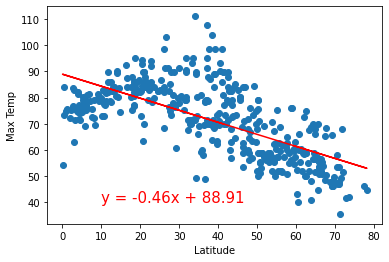

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

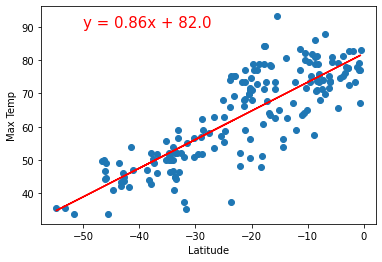

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

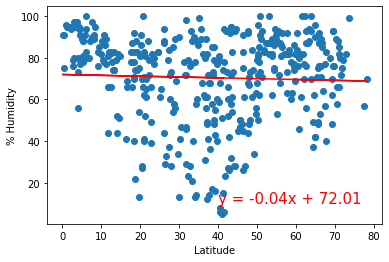

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

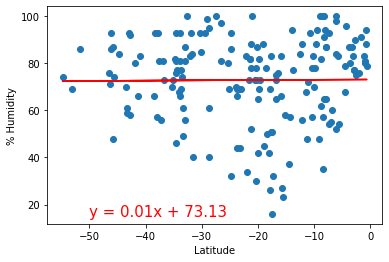

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

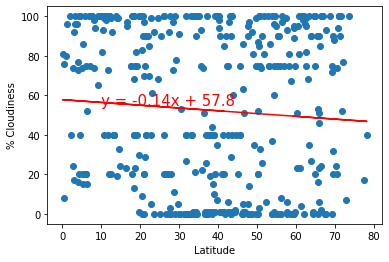

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(10,55))

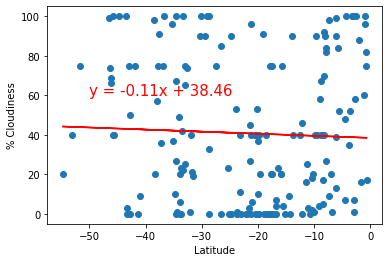

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

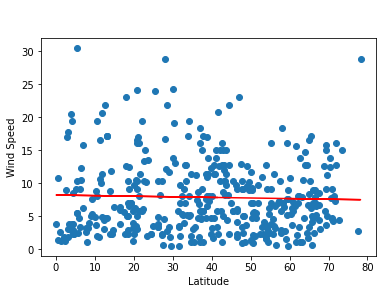

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

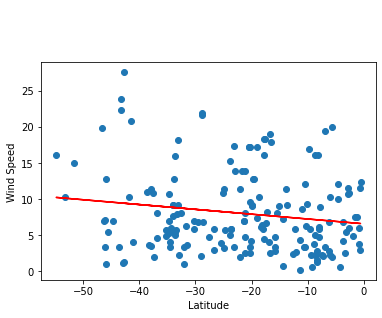

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))